In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import load_model

In [5]:
img_width, img_height = 150, 150

train_data_dir = '/train'
validation_data_dir = '/validation'

nb_train_samples = 2678
nb_validation_samples = 300
epochs = 50
batch_size = 15



if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2), activation='relu'))

model.add(Conv2D(64, (2, 2), activation='relu'))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience = 5)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    height_shift_range = 0.3,
    width_shift_range=0.2,
    rotation_range=3,
    zoom_range=[0.2, 0.6],
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(
     rescale=1. / 255,
    shear_range=0.2,
    height_shift_range = 0.3,
    width_shift_range=0.2,
    rotation_range=3,
    zoom_range=[0.2, 0.6],
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2678 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [8]:
model_train_history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping_monitor])

model.save('5th_try.h5')

Epoch 1/50
178/178 [==============================] - 90s 507ms/step - loss: 0.6773 - acc: 0.6111 - val_loss: 0.6508 - val_acc: 0.6233
Epoch 2/50
178/178 [==============================] - 86s 483ms/step - loss: 0.6494 - acc: 0.6331 - val_loss: 0.6003 - val_acc: 0.7033
Epoch 3/50
178/178 [==============================] - 82s 460ms/step - loss: 0.6314 - acc: 0.6607 - val_loss: 0.5897 - val_acc: 0.7133
Epoch 4/50
178/178 [==============================] - 78s 441ms/step - loss: 0.6128 - acc: 0.6817 - val_loss: 0.5688 - val_acc: 0.7067
Epoch 5/50
178/178 [==============================] - 79s 441ms/step - loss: 0.6003 - acc: 0.6781 - val_loss: 0.5561 - val_acc: 0.7467
Epoch 6/50
178/178 [==============================] - 88s 494ms/step - loss: 0.5756 - acc: 0.7146 - val_loss: 0.5067 - val_acc: 0.7467
Epoch 7/50
178/178 [==============================] - 89s 498ms/step - loss: 0.5387 - acc: 0.7525 - val_loss: 0.4990 - val_acc: 0.7833
Epoch 8/50
178/178 [==============================] - 9

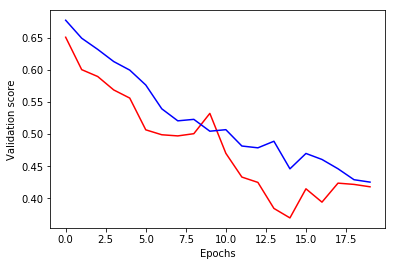

In [10]:
plt.plot(model_train_history.history['val_loss'], 'r', model_train_history.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

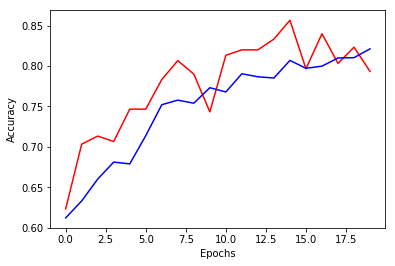

In [11]:
plt.plot(model_train_history.history['val_acc'], 'r', model_train_history.history['acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [1]:
from keras.models import load_model
model = load_model('5th_try.h5')

C:\Users\InfluencerDB\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 32)        4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 128)       32896     
__________